Customer Churn Prediction

Importing the libraries for the EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Csv file and storing it in a dataframe df

In [2]:
df = pd.read_csv('project2.csv')

 Printing the dataset

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
def convert_value(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['Churn'] = df['Churn'].apply(convert_value)
df['Partner'] = df['Partner'].apply(convert_value)
df['Dependents'] = df['Dependents'].apply(convert_value)
df['PhoneService'] = df['PhoneService'].apply(convert_value)
df['PaperlessBilling'] = df['PaperlessBilling'].apply(convert_value)
df['gender'] = df['gender'].apply(convert_value)

In [9]:
df['OnlineSecurity'] = df['OnlineSecurity'].apply(convert_value)
df['OnlineBackup'] = df['OnlineBackup'].apply(convert_value)
df['DeviceProtection'] = df['DeviceProtection'].apply(convert_value)
df['TechSupport'] = df['TechSupport'].apply(convert_value)
df['StreamingTV'] = df['StreamingTV'].apply(convert_value)
df['StreamingMovies'] = df['StreamingMovies'].apply(convert_value)

In [10]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'] = df['MultipleLines'].apply(convert_value)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [12]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,0,0,0,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
MultipleLines,0,0,0,0,0
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,0,1,1,1,0


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [15]:
df.corr()

C:\Users\khush\AppData\Local\Temp\ipykernel_27536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,NaN,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102395,0.150889
Partner,NaN,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318812,-0.150448
Dependents,NaN,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.064535,-0.164221
tenure,NaN,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.824757,-0.352229
PhoneService,NaN,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.112851,0.011942
MultipleLines,NaN,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468689,0.040102
OnlineSecurity,NaN,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412245,-0.171226
OnlineBackup,NaN,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509692,-0.082255
DeviceProtection,NaN,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522462,-0.066160


In [16]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [17]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [18]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [19]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
model = RandomForestClassifier(n_estimators=80,random_state=123)

In [22]:
x = df.drop(['Churn','customerID','OnlineSecurity','Contract','PaymentMethod','InternetService'],axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85
1,0,0,0,0,34,1,0,0,1,0,0,0,0,56.95,1889.50
2,0,0,0,0,2,1,0,1,0,0,0,0,1,53.85,108.15
3,0,0,0,0,45,0,0,0,1,1,0,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,0,1,1,1,1,1,84.80,1990.50
7039,0,0,1,1,72,1,1,1,1,0,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,0,0,0,0,0,0,1,29.60,346.45
7041,0,1,1,0,4,1,1,0,0,0,0,0,1,74.40,306.60


In [23]:
x['gender'] = x['gender'].astype('float')
x['SeniorCitizen'] = x['SeniorCitizen'].astype('float')
x['Partner'] = x['Partner'].astype('float')
x['Dependents'] = x['Dependents'].astype('float')
x['PhoneService'] = x['PhoneService'].astype('float')
x['MultipleLines'] = x['MultipleLines'].astype('float')
x['OnlineBackup'] = x['OnlineBackup'].astype('float')
x['DeviceProtection'] = x['DeviceProtection'].astype('float')
x['TechSupport'] = x['TechSupport'].astype('float')
x['StreamingTV'] = x['StreamingTV'].astype('float')
x['StreamingMovies'] = x['StreamingMovies'].astype('float')
x['PaperlessBilling'] = x['PaperlessBilling'].astype('float')
x['tenure'] = x['tenure'].astype('float')

In [24]:
y = df['Churn']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [26]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
941,0.0,0.0,0.0,1.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.15,382.20
1404,0.0,0.0,0.0,0.0,35.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,23.30,797.10
5515,0.0,0.0,1.0,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.35,309.25
3684,0.0,0.0,0.0,0.0,43.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,75.35,3161.40
7017,0.0,0.0,0.0,0.0,51.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.65,1020.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.80,56.00
5570,0.0,0.0,1.0,1.0,37.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,95.15,3532.85
2125,0.0,0.0,1.0,1.0,67.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,75.50,5229.45
5272,0.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,90.10,521.30


In [27]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=123)

In [28]:
y_pred = model.predict(X_test)

In [29]:
acc = accuracy_score(y_test,y_pred)
acc

0.7737813535257927

In [30]:
from sklearn.model_selection import validation_curve

estimator_range =  np.arange(1,101,5)

In [31]:
train_score, validation_score =  validation_curve(RandomForestClassifier(random_state=42),
                                                  x,y,param_name='n_estimators',
                                                  param_range=estimator_range,scoring='accuracy',
                                                  cv = 5,n_jobs=-1)

In [32]:
train_score_mean = np.mean(train_score,axis=1)

In [33]:
train_score_std = np.std(train_score,axis=1)
validation_score_mean = np.mean(validation_score,axis=1)
validation_score_std = np.std(validation_score,axis=1)

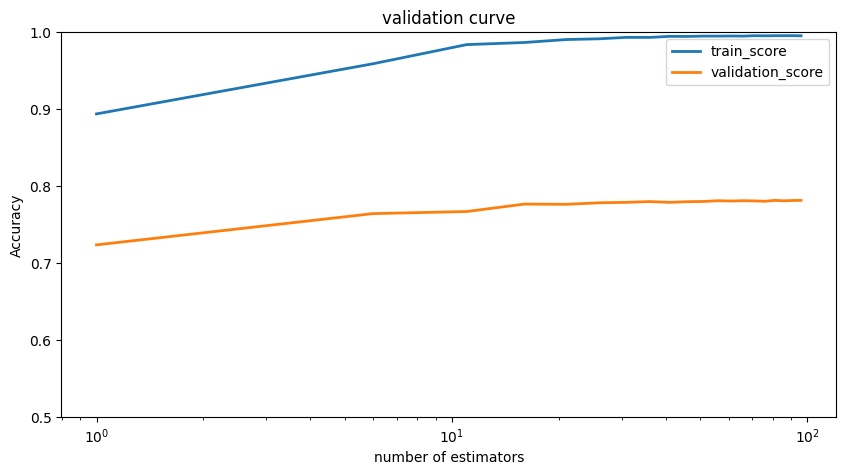

In [34]:
plt.figure(figsize=(10,5))
plt.title("validation curve")
plt.xlabel("number of estimators")
plt.ylabel('Accuracy')
plt.ylim(0.5,1)

plt.semilogx(estimator_range,train_score_mean,label = 'train_score',lw =2)
plt.semilogx(estimator_range,validation_score_mean,label = 'validation_score',lw =2)
plt.legend()
plt.show()

In [35]:
conf_rep = confusion_matrix(y_test,y_pred)
conf_rep

array([[1371,  152],
       [ 326,  264]], dtype=int64)

In [36]:
class_rep = classification_report(y_test,y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1523
           1       0.63      0.45      0.52       590

    accuracy                           0.77      2113
   macro avg       0.72      0.67      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [37]:
import pickle
pickle.dump(model, open('customerchurnpredict.pkl','wb'))

In [39]:
pickleFile = open("customerchurnpredict.pkl","rb")

obj = pd.read_pickle(pickleFile)
print (obj)

RandomForestClassifier(n_estimators=80, random_state=123)
